# **Modeling**

The problem is a classification problem with ordinal labels. We have the following possible values for the target variable: None, Low, Medium, High, Very High. We will first try some suitable models for ordinal classification:

1. **Ordinal Logistic Regression:**
   - **Type:** Supervised learning, ordinal classification.
   - **Strengths:** Designed specifically for ordinal outcomes, interpretable, and extends logistic regression to handle ordered categories.
   - **Considerations:** Assumes the proportional odds assumption.

2. **Support Vector Machines (SVM) for Ordinal Classification:**
   - **Type:** Supervised learning, ordinal classification.
   - **Strengths:** Effective in high-dimensional spaces, versatile, and can be adapted for ordinal targets.
   - **Considerations:** Sensitive to the choice of kernel function and parameters.

3. **Random Forest Classifier for Ordinal Regression:**
   - **Type:** Supervised learning, classification.
   - **Strengths:** Handles non-linearity and interactions, robust to overfitting, and can handle ordinal targets by using the `OrdinalClassifier` from scikit-learn.
   - **Considerations:** Might not be as interpretable as ordinal logistic regression.


4. **Ordinal Neural Networks:**
   - **Type:** Deep learning, ordinal classification.
   - **Strengths:** Can capture complex relationships, automatically learns feature representations, and can be adapted for ordinal outcomes.
   - **Considerations:** Requires more data, computationally intensive, and might be overkill for simpler problems.

In [19]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import lightgbm as lgb
import xgboost as xgb


In [2]:
# Importing the datasets
merged_df = pd.read_csv('datasets/merged.csv', na_filter=False, encoding = "latin")
test_merged_filled = pd.read_csv('datasets/test_merged_filled.csv', na_filter=False, encoding = "latin")

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Normal (kWh)                  11016 non-null  float64
 1   Economic (kWh)                11016 non-null  float64
 2   Self-consumption (kWh)        11016 non-null  float64
 3   Injection                     11016 non-null  object 
 4   temp                          11016 non-null  float64
 5   feels_like                    11016 non-null  float64
 6   temp_min                      11016 non-null  float64
 7   temp_max                      11016 non-null  float64
 8   pressure                      11016 non-null  int64  
 9   humidity                      11016 non-null  int64  
 10  wind_speed                    11016 non-null  float64
 11  rain_1h                       11016 non-null  float64
 12  clouds_all                    11016 non-null  int64  
 13  w

In [4]:
# Injection is the Target Variable
X = merged_df.drop(['Injection'], axis=1)
y = merged_df['Injection']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

print(X_train.isnull().sum())
print(y_train.isnull().sum())



X_train.shape, X_test.shape, y_train.shape, y_test.shape

Normal (kWh)                    0
Economic (kWh)                  0
Self-consumption (kWh)          0
temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
humidity                        0
wind_speed                      0
rain_1h                         0
clouds_all                      0
weather_broken clouds           0
weather_few clouds              0
weather_heavy intensity rain    0
weather_light rain              0
weather_moderate rain           0
weather_overcast clouds         0
weather_scattered clouds        0
weather_sky is clear            0
hour                            0
day_of_year                     0
rain_binary                     0
dtype: int64
0


((8262, 23), (2754, 23), (8262,), (2754,))

In [5]:
# Save every model and its accuracy in a dictionary
Results = {}

In [6]:
state_value = 24

In [7]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=['None', 'Low', 'Medium', 'High', 'Very High'], y=y_train)
class_weights = {label: weight for label, weight in zip(['None', 'Low', 'Medium', 'High', 'Very High'], class_weights)}

print(class_weights)

{'None': 0.2821239542427864, 'Low': 5.022492401215805, 'Medium': 2.02997542997543, 'High': 2.025, 'Very High': 3.704932735426009}


In [27]:
# Print unique values count of the target variable
print(y_train.value_counts())

Injection
None         5857
High          816
Medium        814
Very High     446
Low           329
Name: count, dtype: int64


In [8]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [30]:
# Function to plot bar graph with model names and accuracies
def plot_accuracies_bar_graph(models, accuracies):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=models, y=accuracies, hue=models)
    plt.title('Model Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0.6, 1)  # Set y-axis limit to start from 0.6
    # Customize x-axis labels for multiline display
    plt.xticks(rotation=45, ha='right')

    # Display accuracy values on top of each bar
    for i, model in enumerate(models):
        plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center', va='bottom')

    plt.show()

# **Models**
---

## **Logistic Regression**

Logistic Regression Accuracy: 0.8163


c:\Users\despacito\miniconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


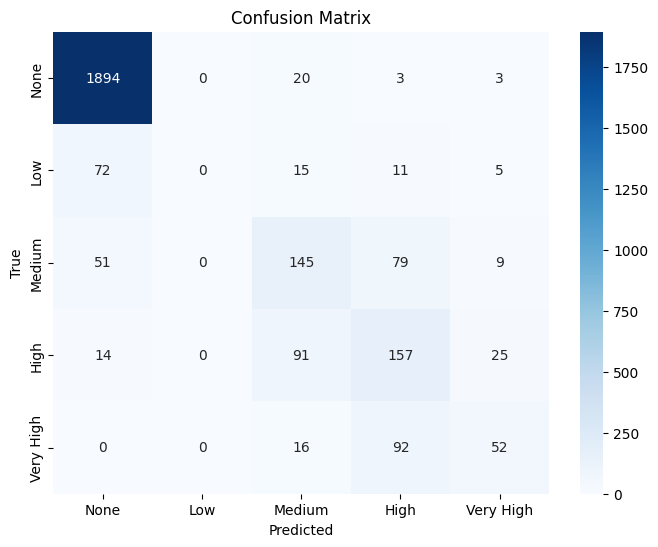

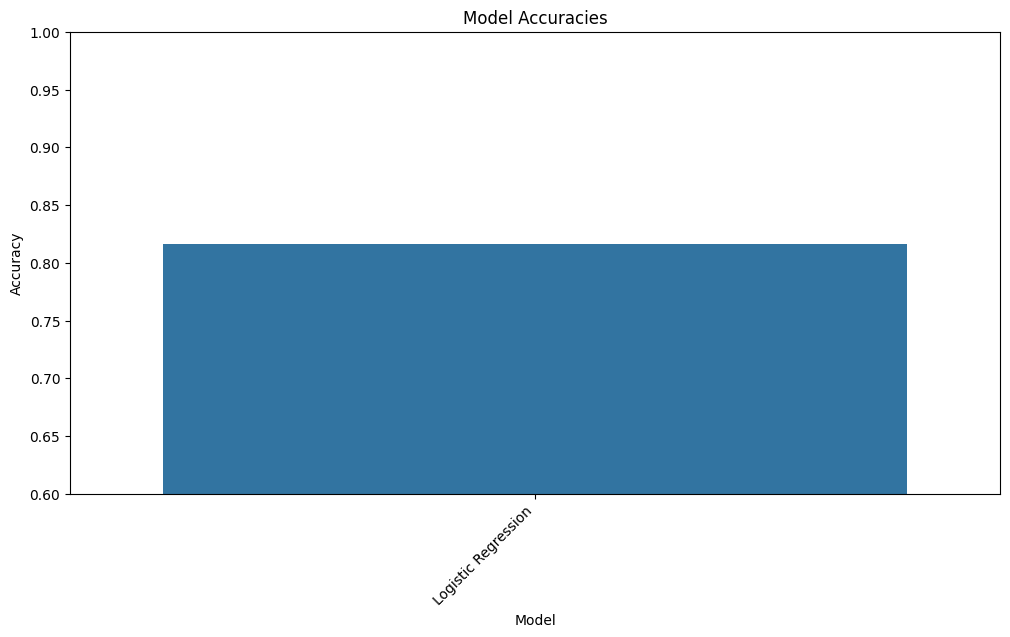

In [10]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=state_value, max_iter=8000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print accuracy
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_logreg, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Logistic Regression'] = {'model': logreg_model, 'accuracy': accuracy_logreg}

models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Logistic Regression Weighted**

Logistic Regression with Class Weights Accuracy: 0.7792


c:\Users\despacito\miniconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


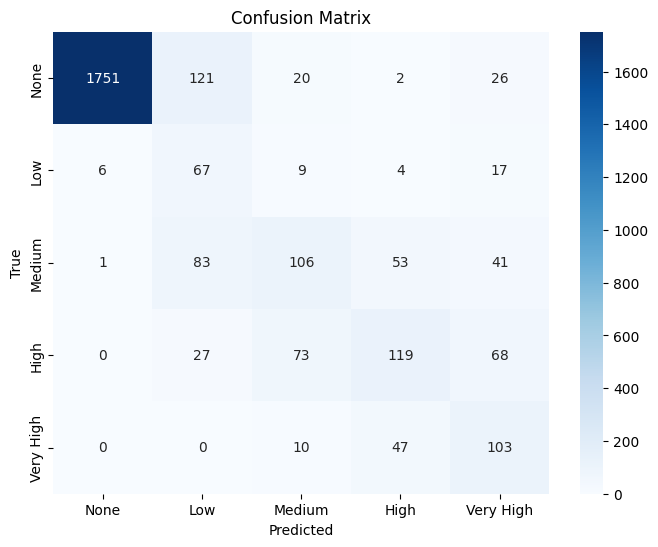

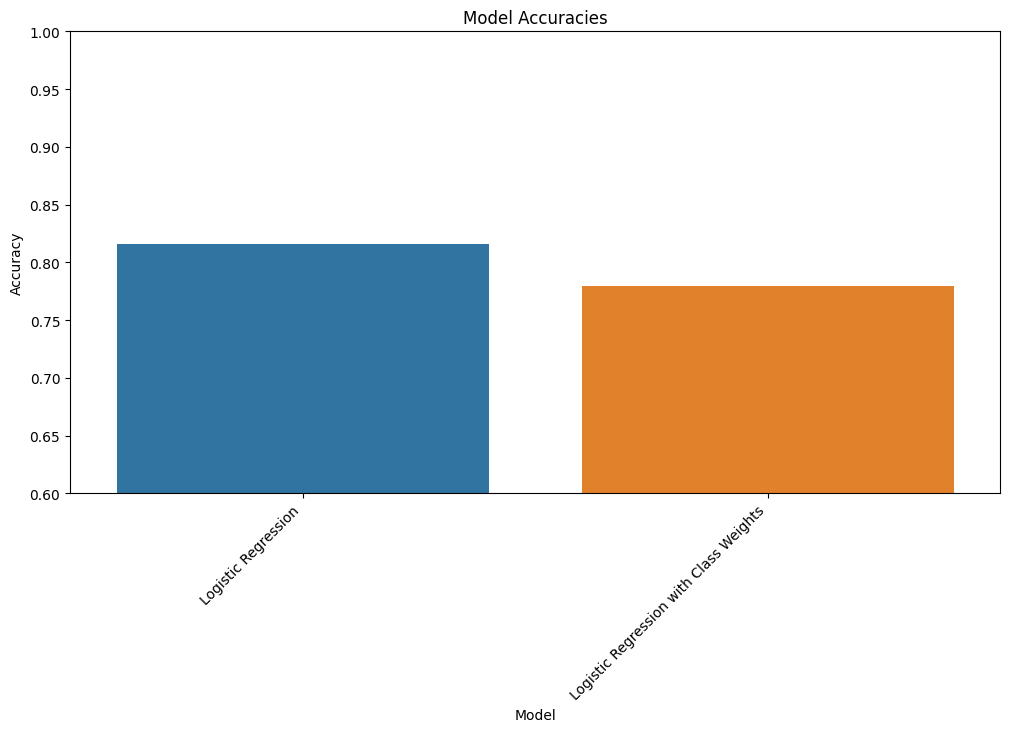

In [11]:
# Initialize another Logistic Regression model with class weights
logreg_model_class_weighted = LogisticRegression(random_state=state_value, max_iter=8000, class_weight=class_weights)

# Train the model
logreg_model_class_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_class_weighted = logreg_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_logreg_class_weighted = accuracy_score(y_test, y_pred_logreg_class_weighted)

# Print accuracy
print(f'Logistic Regression with Class Weights Accuracy: {accuracy_logreg_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_logreg_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Logistic Regression with Class Weights'] = {'model': logreg_model_class_weighted, 'accuracy': accuracy_logreg_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Support Vector Machines (SVM)**

Support Vector Machine Accuracy: 0.8326


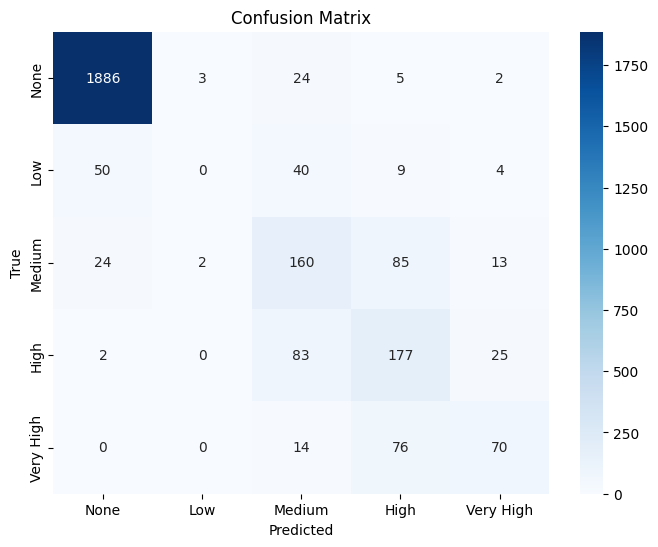

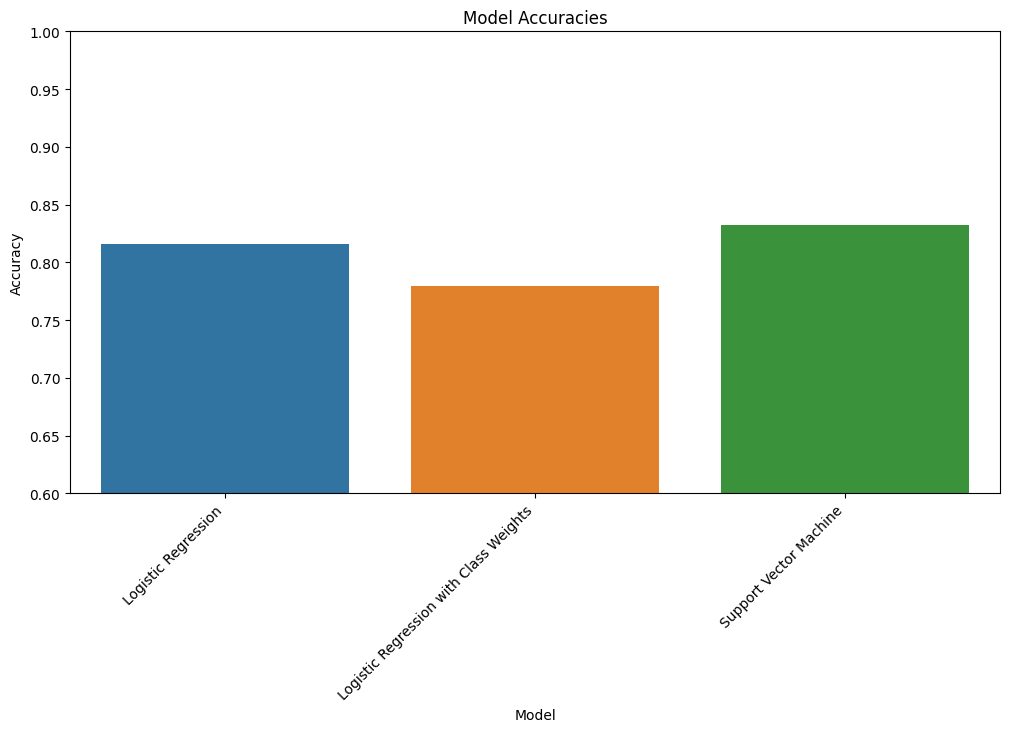

In [12]:
# Standardize the data (feature scaling) using a pipeline
svm_model = make_pipeline(StandardScaler(), SVC(random_state=state_value))

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy
print(f'Support Vector Machine Accuracy: {accuracy_svm:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Support Vector Machine'] = {'model': svm_model, 'accuracy': accuracy_svm}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Support Vector Machines (SVM) Weighted**

Support Vector Machine with Class Weights Accuracy: 0.8043


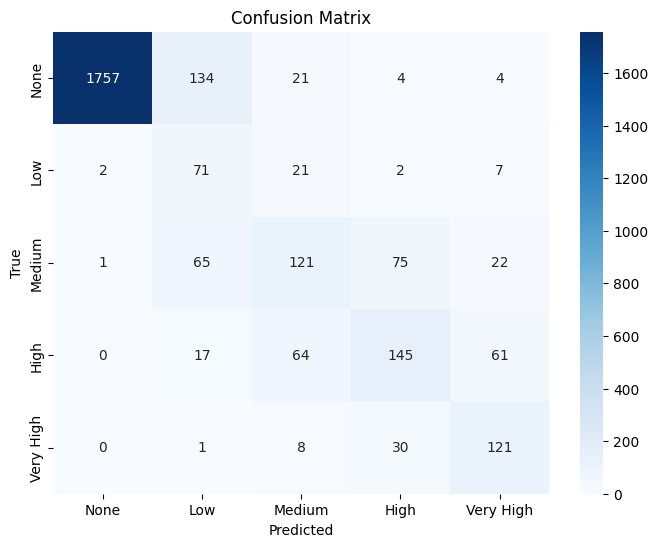

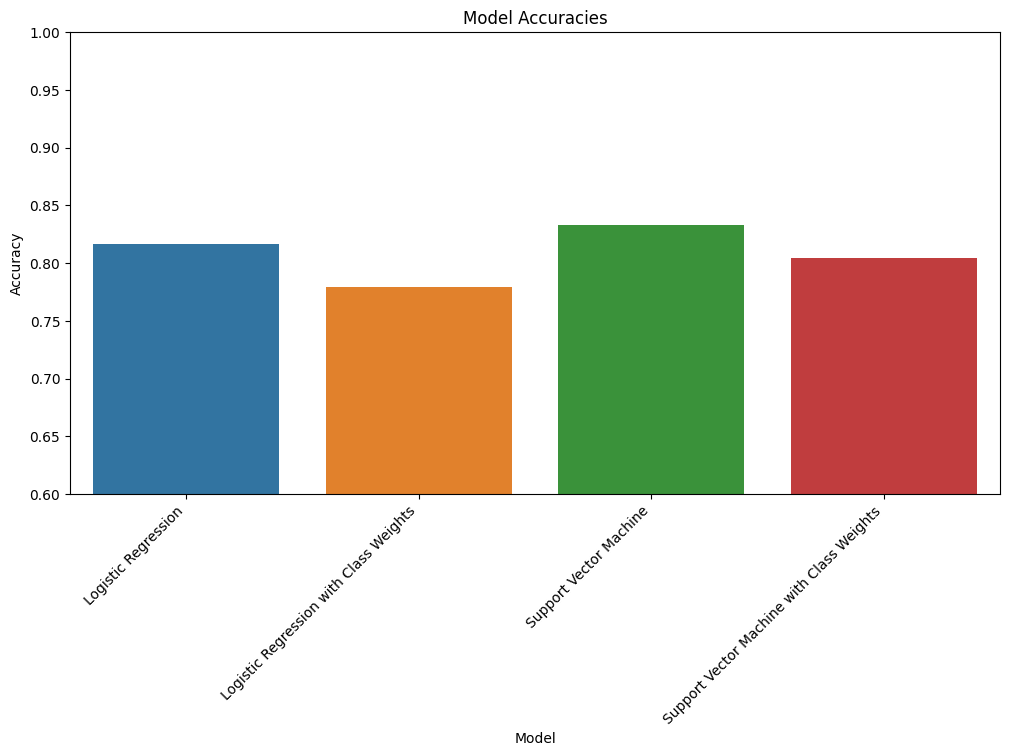

In [13]:
# Initialize the Support Vector Machine model with class weights and feature scaling
svm_model_class_weighted = make_pipeline(StandardScaler(), SVC(random_state=state_value, class_weight=class_weights))

# Train the model
svm_model_class_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_class_weighted = svm_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_svm_class_weighted = accuracy_score(y_test, y_pred_svm_class_weighted)

# Print accuracy
print(f'Support Vector Machine with Class Weights Accuracy: {accuracy_svm_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_svm_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Support Vector Machine with Class Weights'] = {'model': svm_model_class_weighted, 'accuracy': accuracy_svm_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Decision Tree**

Decision Tree Accuracy: 0.8446


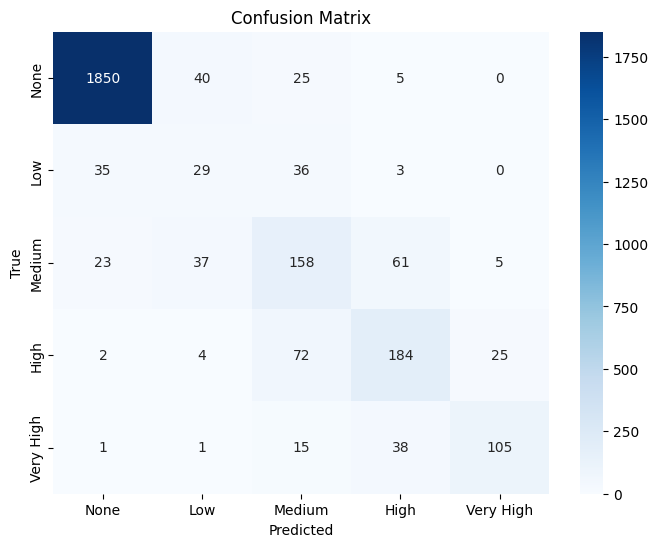

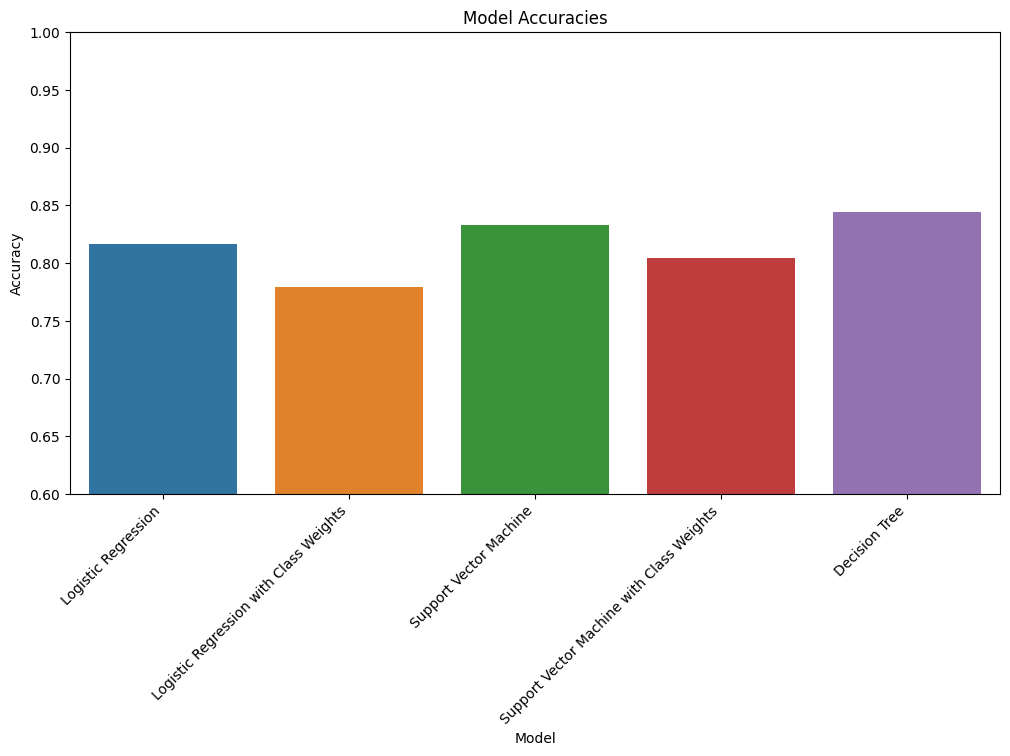

In [14]:
# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=state_value)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print accuracy
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_tree, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Decision Tree'] = {'model': tree_model, 'accuracy': accuracy_tree}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Decision Tree Weighted**

Decision Tree with Class Weights Accuracy: 0.8457


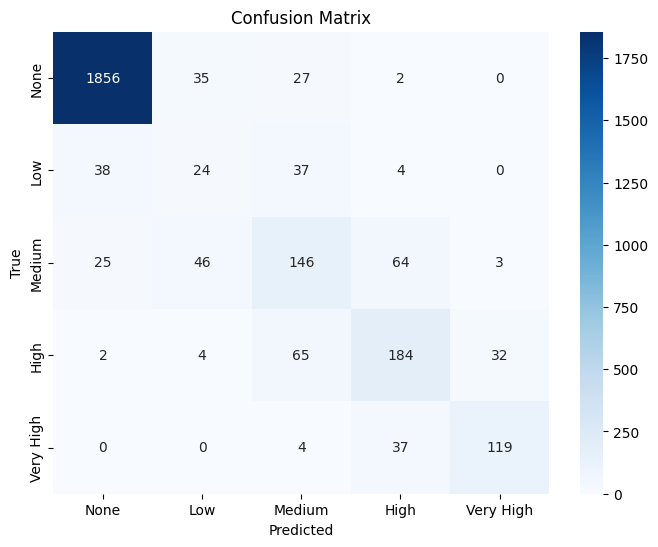

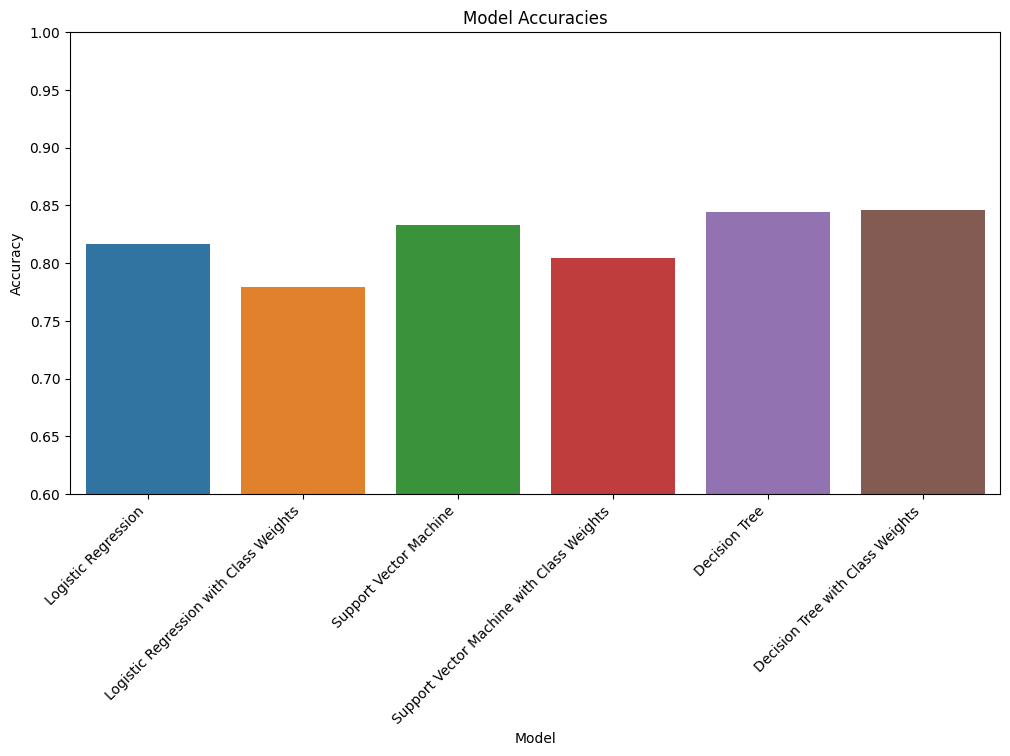

In [15]:
# Initialize the Decision Tree model with class weights
tree_model_class_weighted = DecisionTreeClassifier(random_state=state_value, class_weight=class_weights)

# Train the model
tree_model_class_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree_class_weighted = tree_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_tree_class_weighted = accuracy_score(y_test, y_pred_tree_class_weighted)

# Print accuracy
print(f'Decision Tree with Class Weights Accuracy: {accuracy_tree_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_tree_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Decision Tree with Class Weights'] = {'model': tree_model_class_weighted, 'accuracy': accuracy_tree_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Decision Tree with Grid Search**

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8555


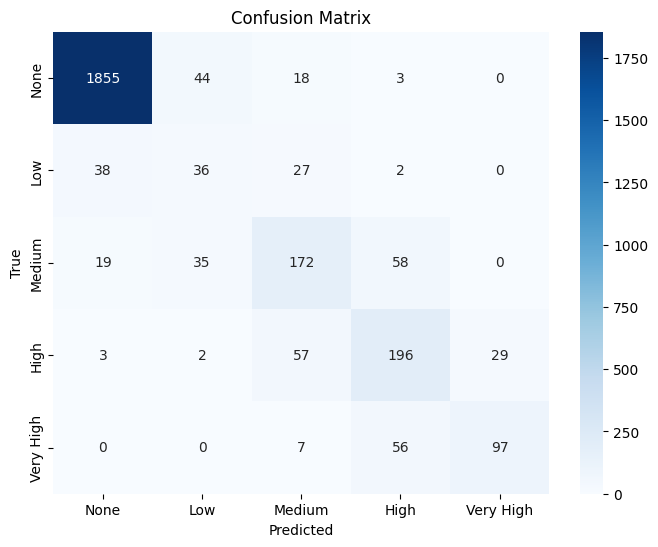

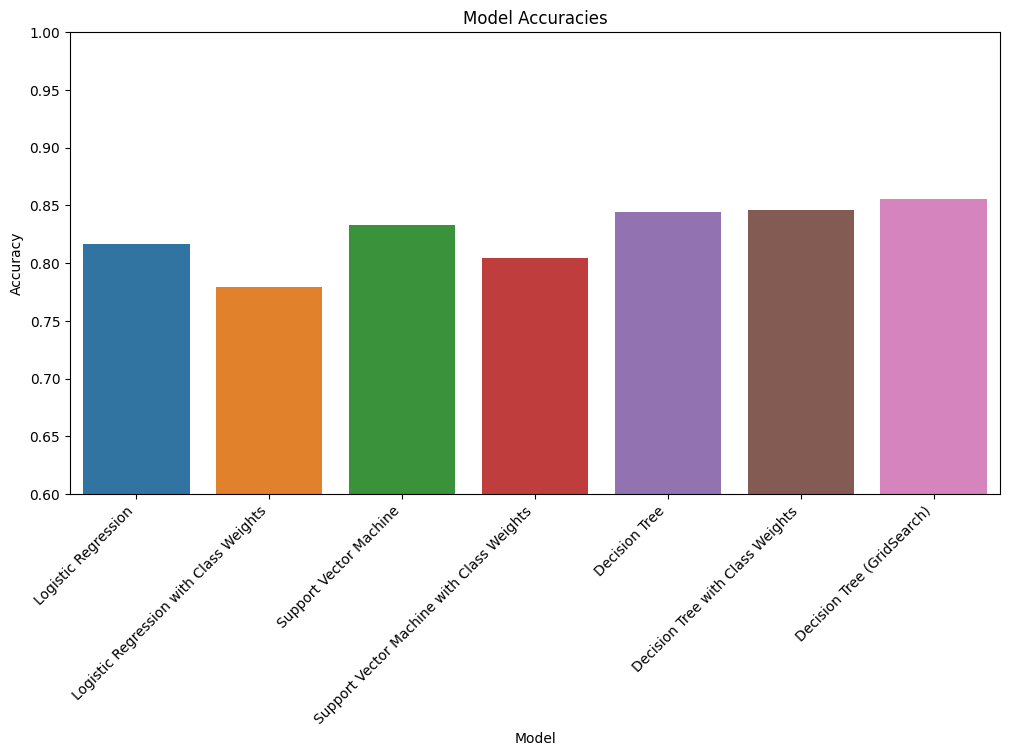

In [16]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=state_value)

# Create GridSearchCV instance
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Make predictions on the test set using the best model
best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_tree, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the best model and its accuracy in the Results dictionary
Results['Decision Tree (GridSearch)'] = {'model': best_tree_model, 'accuracy': accuracy_tree}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Decision Tree with Grid Search Weighted**

Best Parameters (with Class Weights): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Accuracy (with Class Weights): 0.8420


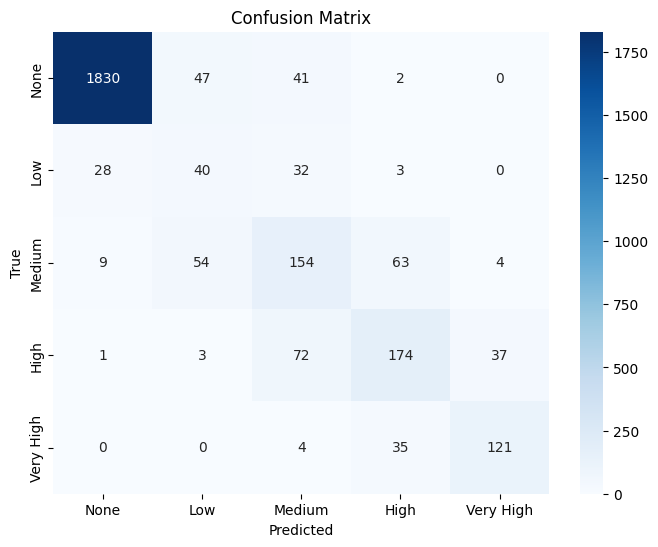

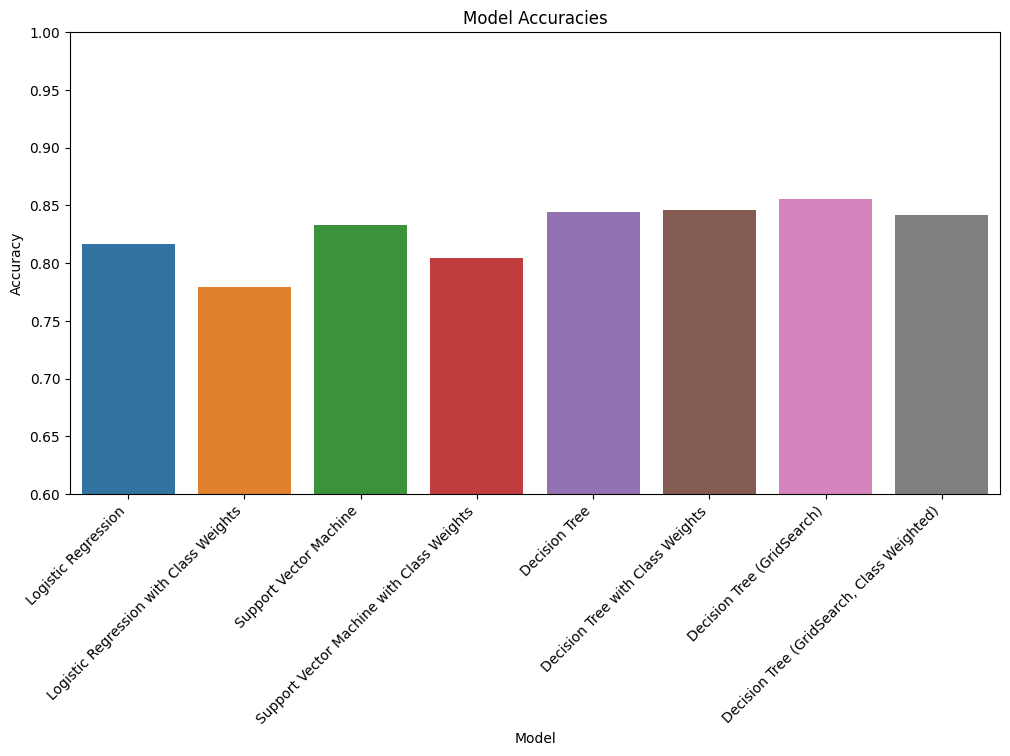

In [18]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model with class weights
tree_model_class_weighted = DecisionTreeClassifier(random_state=state_value, class_weight=class_weights)

# Create GridSearchCV instance
grid_search_class_weighted = GridSearchCV(tree_model_class_weighted, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_class_weighted.fit(X_train, y_train)

# Get the best parameters
best_params_class_weighted = grid_search_class_weighted.best_params_
print(f'Best Parameters (with Class Weights): {best_params_class_weighted}')

# Make predictions on the test set using the best model
best_tree_model_class_weighted = grid_search_class_weighted.best_estimator_
y_pred_tree_class_weighted = best_tree_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_tree_class_weighted = accuracy_score(y_test, y_pred_tree_class_weighted)
print(f'Decision Tree Accuracy (with Class Weights): {accuracy_tree_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_tree_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the best model and its accuracy in the Results dictionary
Results['Decision Tree (GridSearch, Class Weighted)'] = {'model': best_tree_model_class_weighted, 'accuracy': accuracy_tree_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Decision Tree with Grid Search, Weighted, trained on precision**

Best Parameters (with Class Weights, Precision): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy (with Class Weights, Precision): 0.8235


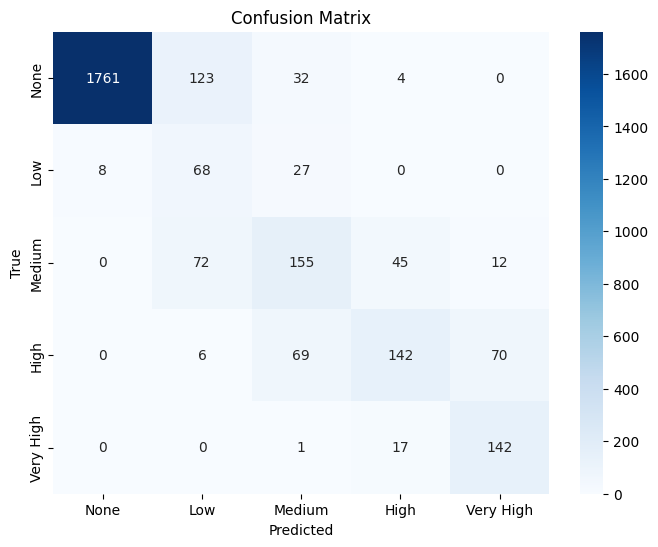

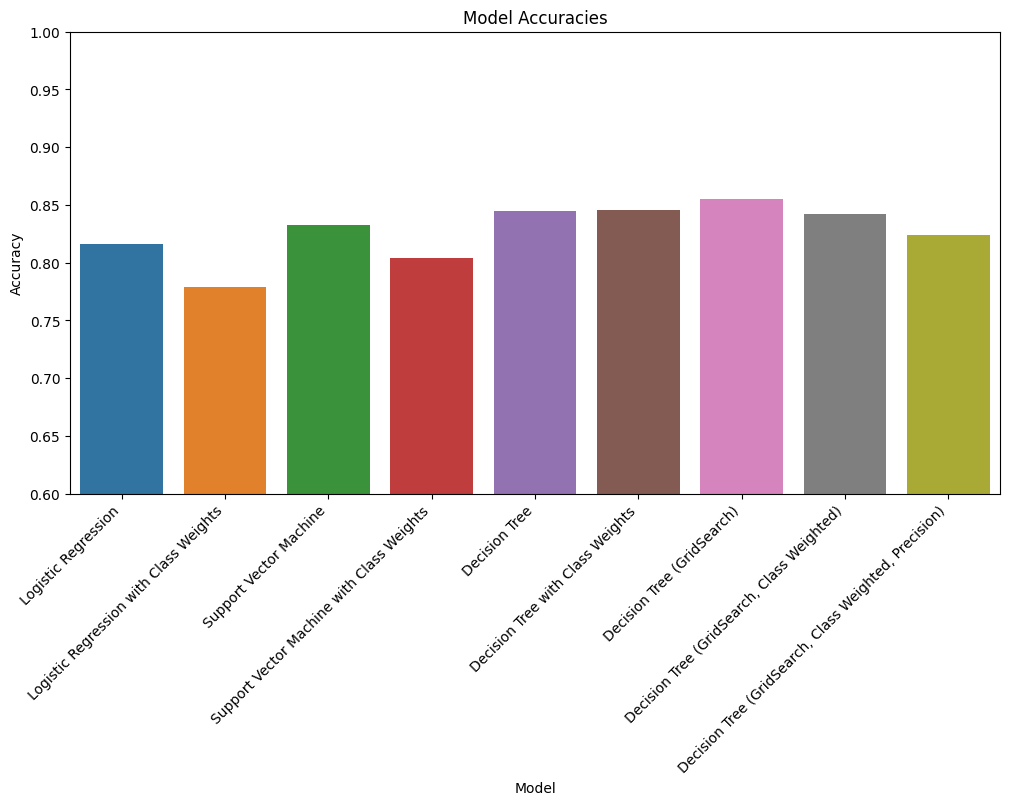

In [21]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model with class weights
tree_model_class_weighted_precision = DecisionTreeClassifier(random_state=state_value, class_weight=class_weights)

# Create GridSearchCV instance with precision as the scoring metric
grid_search_class_weighted_precision = GridSearchCV(tree_model_class_weighted_precision, param_grid, cv=5, scoring='precision_weighted')

# Fit the model to the data
grid_search_class_weighted_precision.fit(X_train, y_train)

# Get the best parameters
best_params_class_weighted_precision = grid_search_class_weighted_precision.best_params_
print(f'Best Parameters (with Class Weights, Precision): {best_params_class_weighted_precision}')

# Make predictions on the test set using the best model
best_tree_model_class_weighted_precision = grid_search_class_weighted_precision.best_estimator_
y_pred_tree_class_weighted_precision = best_tree_model_class_weighted_precision.predict(X_test)

# Calculate accuracy
accuracy_tree_class_weighted_precision = accuracy_score(y_test, y_pred_tree_class_weighted_precision)
print(f'Decision Tree Accuracy (with Class Weights, Precision): {accuracy_tree_class_weighted_precision:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_tree_class_weighted_precision, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the best model and its accuracy in the Results dictionary
Results['Decision Tree (GridSearch, Class Weighted, Precision)'] = {'model': best_tree_model_class_weighted_precision, 'accuracy': accuracy_tree_class_weighted_precision}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Naive Bayes**

Naive Bayes Accuracy: 0.6398


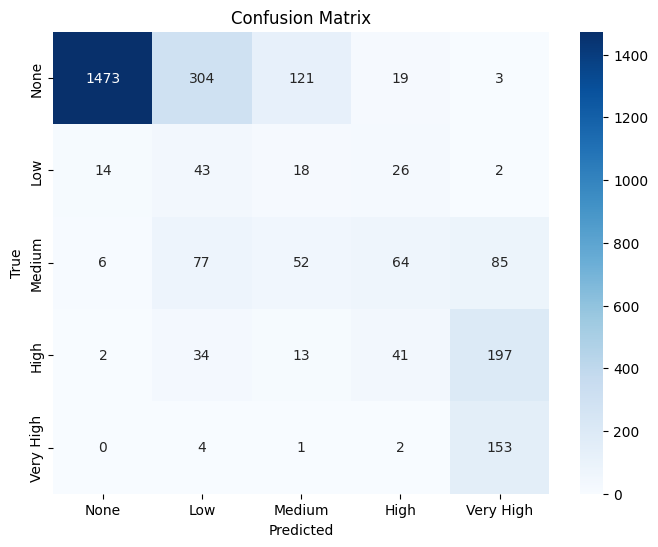

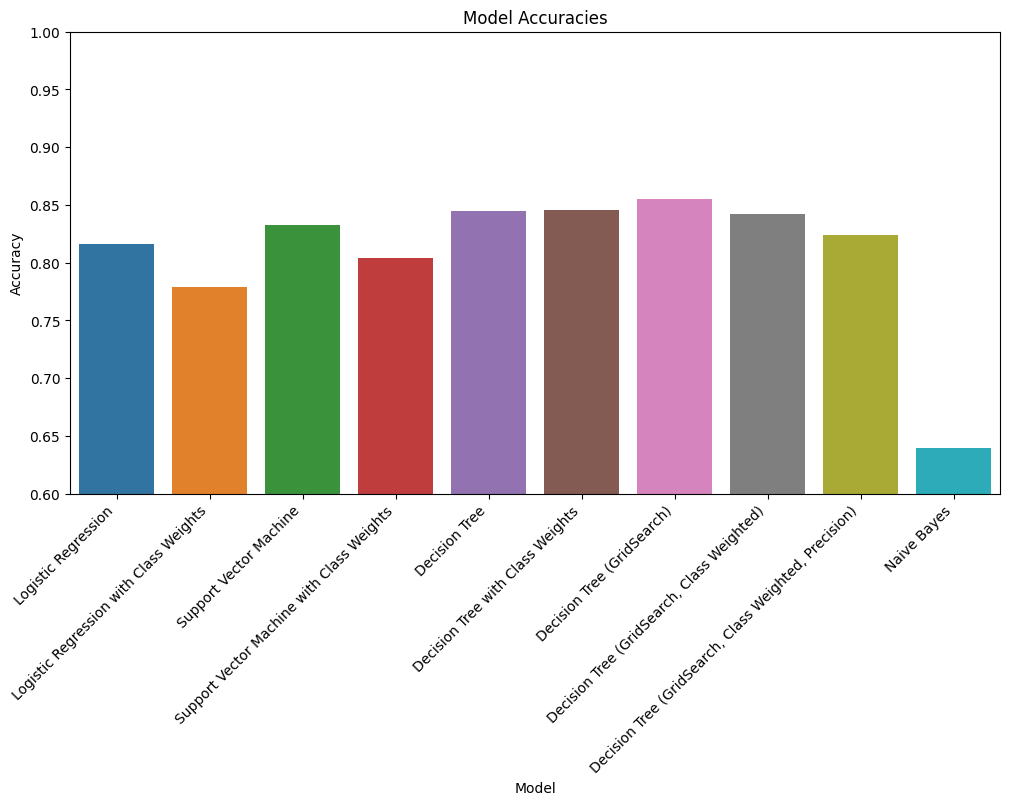

In [22]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

# Print accuracy
print(f'Naive Bayes Accuracy: {accuracy_naive_bayes:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_naive_bayes, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Naive Bayes'] = {'model': naive_bayes_model, 'accuracy': accuracy_naive_bayes}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

(Makes sense sinse Naive Bayes is used on balanced datasets)

## **Random Forest**

Random Forest Accuracy: 0.8704


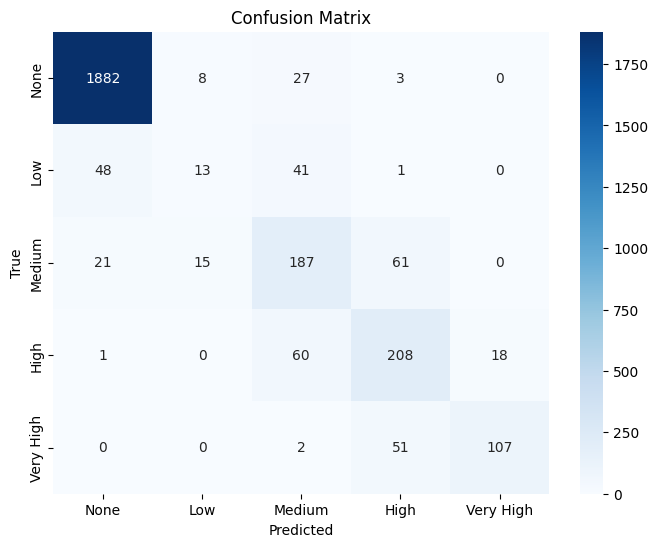

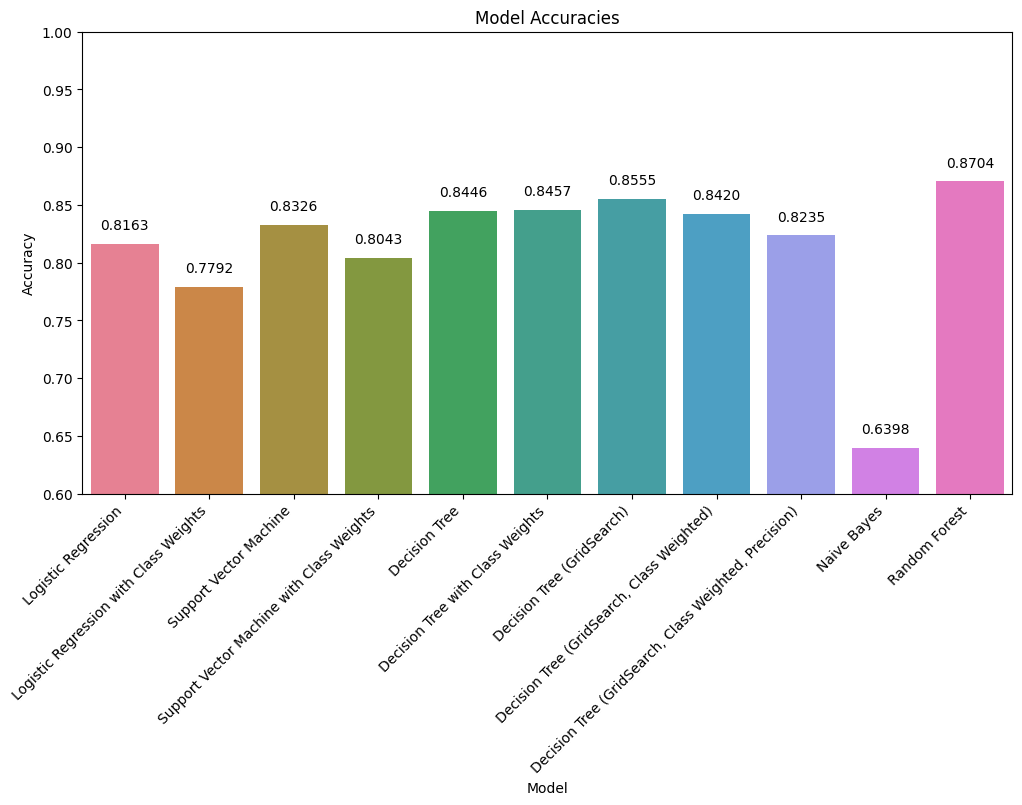

In [32]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=state_value)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print accuracy
print(f'Random Forest Accuracy: {accuracy_random_forest:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_random_forest, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Random Forest'] = {'model': random_forest_model, 'accuracy': accuracy_random_forest}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Random Forest Weighted**

Random Forest with Class Weights Accuracy: 0.8704


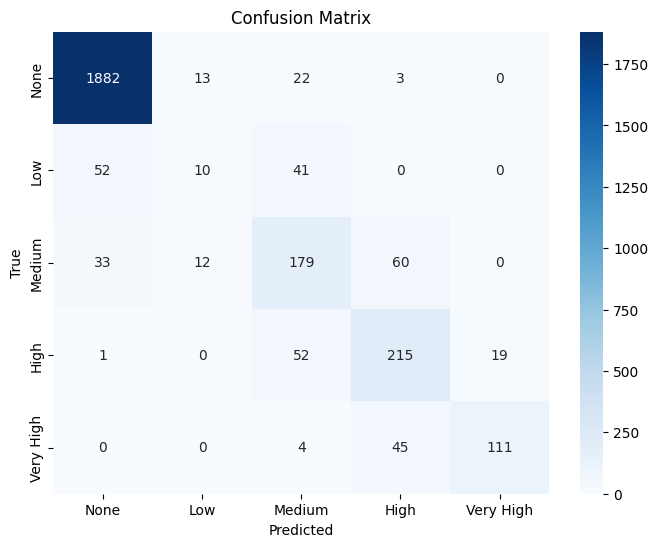

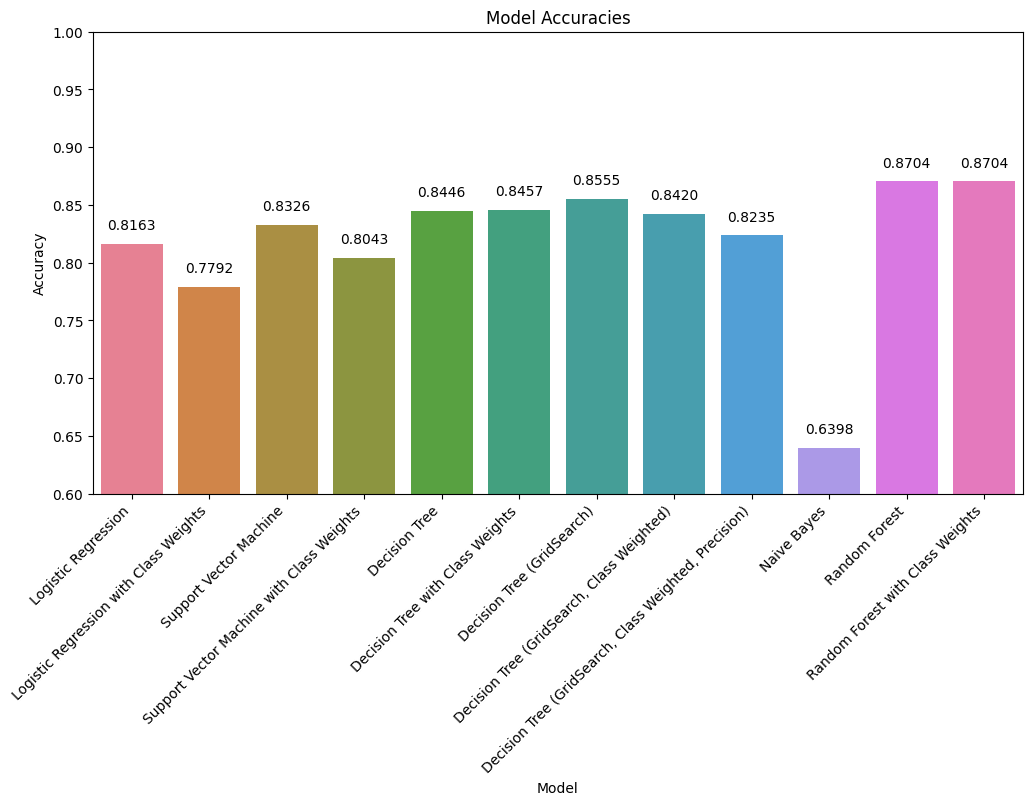

In [35]:
# Initialize the Random Forest model with class weights
random_forest_model_class_weighted = RandomForestClassifier(random_state=state_value, class_weight=class_weights)

# Train the model
random_forest_model_class_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest_class_weighted = random_forest_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_random_forest_class_weighted = accuracy_score(y_test, y_pred_random_forest_class_weighted)

# Print accuracy
print(f'Random Forest with Class Weights Accuracy: {accuracy_random_forest_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_random_forest_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Random Forest with Class Weights'] = {'model': random_forest_model_class_weighted, 'accuracy': accuracy_random_forest_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

## **Random Forest with Grid Search**

Best Parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy (GridSearch): 0.8715


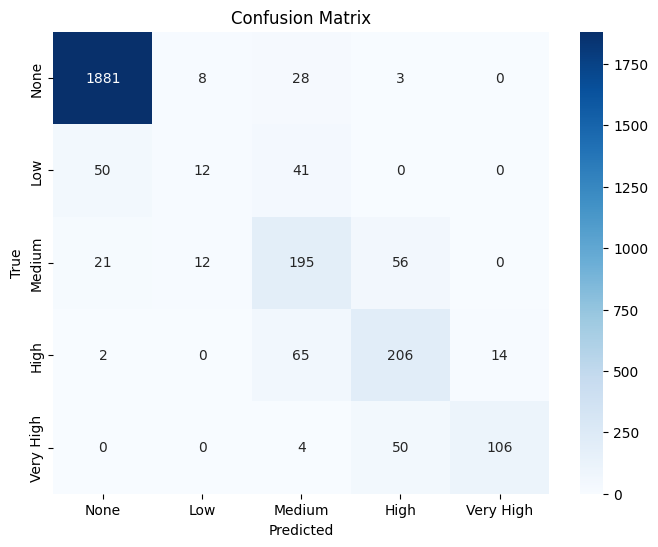

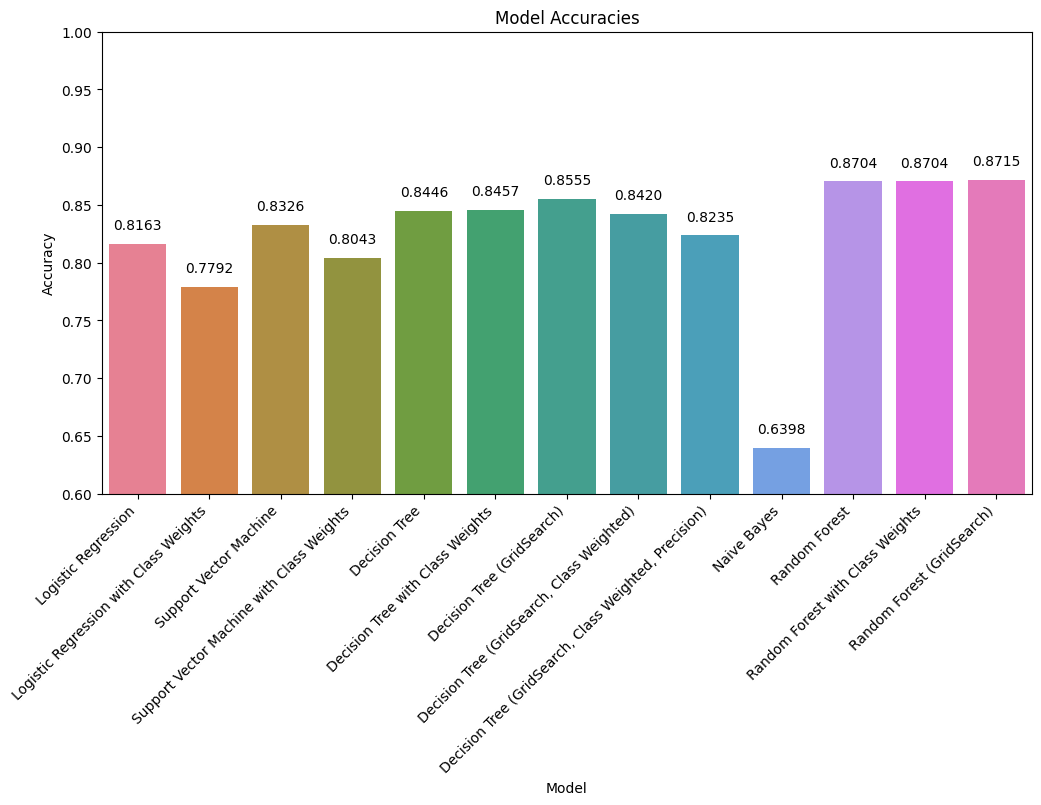

In [37]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Create GridSearchCV instanc`e
grid_search_rf = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters (Random Forest): {best_params_rf}')

# Make predictions on the test set using the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy (GridSearch): {accuracy_rf:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the best model and its accuracy in the Results dictionary
Results['Random Forest (GridSearch)'] = {'model': best_rf_model, 'accuracy': accuracy_rf}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)